In [1]:
import requests

In [8]:
my_times_api_key = '53vJyWTswPKBIuSU6s5Tg5KIhiVsAh0Y'

In [9]:
payload = {'q'         : 'inequality', 
           'begin_date': '20130101' ,
           'end_date'  : '20131231',
           'api-key'   :  my_times_api_key,
           'sort'      : 'oldest' ,
           'offset'    :  20}

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

In [10]:
r = requests.get(base_url, params = payload)

r.url

'http://api.nytimes.com/svc/search/v2/articlesearch.json?q=inequality&begin_date=20130101&end_date=20131231&api-key=53vJyWTswPKBIuSU6s5Tg5KIhiVsAh0Y&sort=oldest&offset=20'

In [11]:
r.text

'{"status":"OK","copyright":"Copyright (c) 2019 The New York Times Company. All Rights Reserved.","response":{"docs":[{"web_url":"https://www.nytimes.com/2013/01/01/opinion/struggling-to-get-a-college-degree.html","snippet":"Readers react to a front-page article describing the travails of three low-income students attending college.","lead_paragraph":"To the Editor:","abstract":"Readers react to a front-page article describing the travails of three low-income students attending college.","print_page":"18","blog":{},"source":"The New York Times","multimedia":[],"headline":{"main":"Struggling to Get a College Degree","kicker":"Letters","content_kicker":null,"print_headline":"Struggling to Get a College Degree","name":null,"seo":null,"sub":null},"keywords":[{"name":"subject","value":"Colleges and Universities","rank":1,"major":"N"},{"name":"subject","value":"Graduation Rates","rank":2,"major":"N"},{"name":"subject","value":"Scholarships and Fellowships","rank":3,"major":"N"},{"name":"subj

In [12]:
r.json()

{'status': 'OK',
 'copyright': 'Copyright (c) 2019 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'web_url': 'https://www.nytimes.com/2013/01/01/opinion/struggling-to-get-a-college-degree.html',
    'snippet': 'Readers react to a front-page article describing the travails of three low-income students attending college.',
    'lead_paragraph': 'To the Editor:',
    'abstract': 'Readers react to a front-page article describing the travails of three low-income students attending college.',
    'print_page': '18',
    'blog': {},
    'source': 'The New York Times',
    'multimedia': [],
    'headline': {'main': 'Struggling to Get a College Degree',
     'kicker': 'Letters',
     'content_kicker': None,
     'print_headline': 'Struggling to Get a College Degree',
     'name': None,
     'seo': None,
     'sub': None},
    'keywords': [{'name': 'subject',
      'value': 'Colleges and Universities',
      'rank': 1,
      'major': 'N'},
     {'name': 'subject', 'va

In [13]:
json = r.json()
json.keys()
json['status']

'OK'

In [14]:
json['response']['docs']

[{'web_url': 'https://www.nytimes.com/2013/01/01/opinion/struggling-to-get-a-college-degree.html',
  'snippet': 'Readers react to a front-page article describing the travails of three low-income students attending college.',
  'lead_paragraph': 'To the Editor:',
  'abstract': 'Readers react to a front-page article describing the travails of three low-income students attending college.',
  'print_page': '18',
  'blog': {},
  'source': 'The New York Times',
  'multimedia': [],
  'headline': {'main': 'Struggling to Get a College Degree',
   'kicker': 'Letters',
   'content_kicker': None,
   'print_headline': 'Struggling to Get a College Degree',
   'name': None,
   'seo': None,
   'sub': None},
  'keywords': [{'name': 'subject',
    'value': 'Colleges and Universities',
    'rank': 1,
    'major': 'N'},
   {'name': 'subject', 'value': 'Graduation Rates', 'rank': 2, 'major': 'N'},
   {'name': 'subject',
    'value': 'Scholarships and Fellowships',
    'rank': 3,
    'major': 'N'},
   {'nam

In [15]:
json['response']['meta']['hits']

914

In [16]:
from time import sleep

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]

for year in years:
    year_string = str(year)
    payload = { 'q'         : 'President Trump', 
                'begin_date':  year_string + '0101',
                'end_date'  :  year_string + '1231',
                'api-key'   :  my_times_api_key,
                'sort'      : 'newest' ,
                'page'      :  0}
    
    r = requests.get(base_url, params = payload)
    json = r.json()
    count  = json['response']['meta']['hits']
    print(year, count)
    sleep(.1)

2013 210
2014 215
2015 1505
2016 6981
2017 15439
2018 14213
2019 9950


In [17]:
import csv

outfile = open('inequality_annual.csv', 'w')
csv_writer = csv.writer(outfile)

header = ['year','article_count']
csv_writer.writerow(header)

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]

for year in years:
    year_string = str(year)
    payload = { 'q'         : 'President Trump', 
                'begin_date':  year_string + '0101',
                'end_date'  :  year_string + '1231',
                'api-key'   :  my_times_api_key,
                'sort'      : 'newest' ,
                'page'      :  0}
    
    sleep(.1)
    
outfile.close()

In [18]:
from time import sleep

base_url = 'http://api.nytimes.com/svc/search/v2/articlesearch.json?'

payload = { 'q'         : 'President Trump', 
            'api-key'   :  my_times_api_key,
            'sort'      : 'newest' ,
            'page'      :  0}
    
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
counts = []
for year in years:
 
    
    year_string = str(year)
    payload['begin_date'] = year_string + '0101'
    payload['end_date']   = year_string + '1231'
    r = requests.get(base_url, params = payload)
    json = r.json()
    count  = json['response']['meta']['hits']
    counts.append(count)
    sleep(.1) 

Populating the interactive namespace from numpy and matplotlib


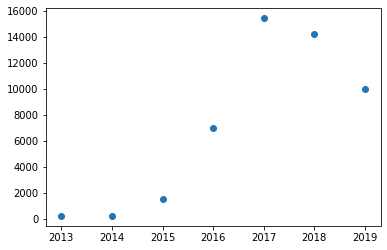

In [19]:
%pylab inline
import matplotlib.pyplot as plt

plt.scatter(years,counts)
plt.ticklabel_format(useOffset=False)